In [1]:
#from __future__ import division
#import os
#os.environ["NUMBA_ENABLE_CUDASIM"] = "1"
#from numba import jit, njit, vectorize, cuda
import numpy as np
import time
import math

In [2]:
mat_dim=open("matrix_dimension.txt","w")

for n in range(100,1300,100) :
    
    mat_dim.write(str(n)+"\n" )
    
    
mat_dim.close()

In [3]:
mat_dim=open("matrix_dimension.txt","r")

rank=[]
for n in mat_dim :
    rank.append(n)
    
mat_dim.close()

In [4]:
delta_time=[]

for r in rank:
    
    r=int(r)
    print(r)
    # Initialize the data matrices
    A = np.random.rand(r,r)
    B = np.random.rand(r,r)


    C = np.zeros((r,r))

    start=time.time()

    B_tr=np.transpose(B)
    
    for i in range(r):
        
        for k in range(r):
            summa=0.0
            for j in range(r) :

                summa=summa+A[i][j]*B_tr[k][j]

            C[i][k]=summa



    finish=time.time()
    
    time_consuming_1=finish-start
    
    delta_time.append(time_consuming_1)
    
    if r==100:
        mat_mul=np.dot(A,B)
        count=0
        for i in range(r):
            for j in range(r):
                
                if abs( mat_mul[i][j]-C[i][j] ) > 10**(-5):
                    count=count+1
                    
        if count!=0:
            print("alt!")
            break

        else:
            print("it's all okay!")





100
it's all okay!
200


In [5]:
file1=open("by_rows.txt","w")

for i in range(len(rank) ):
  line=str(rank[i])+"\t"+str(delta_time[i] )+"\n"
  file1.write(line )

file1.close()

In [6]:
delta_time=[]
       
for r in rank:
    
    r=int(r)
    print(r)
    # Initialize the data matrices
    A = np.random.rand(r,r)
    B = np.random.rand(r,r)

    C = np.zeros((r,r))

    start=time.time()
    
    A_tr=np.transpose(A)
    
    for k in range(r):
        
        for i in range(r):
            summa=0.0
            for j in range(r) :

                summa=summa+A_tr[j][i]*B[j][k]

            C[i][k]=summa

    finish=time.time()
    
    time_consuming_2=finish-start
    
    delta_time.append(time_consuming_2)
    
    if r==100:
        mat_mul=np.dot(A,B)
        count=0
        for i in range(r):
            for j in range(r):
                
                if abs( mat_mul[i][j]-C[i][j] ) > 10**(-5):
                    count=count+1
                    
        if count!=0:
            print("alt!")
            break

        else:
            print("it's all okay!")




100
it's all okay!
200


In [7]:
file2=open("by_columns.txt","w")

for i in range(len(rank) ):
  line=str(rank[i])+ str(delta_time[i] )+"\n"
  file2.write(line )

file2.close()

In [8]:
delta_time=[]

for r in rank:
    
    r=int(r)
    print(r)
    # Initialize the data matrices
    A = np.random.rand(r,r)
    B = np.random.rand(r,r)


    start=time.time()
    
    C=np.matmul(A,B)


    finish=time.time()
    
    time_consuming_1=finish-start
    
    delta_time.append(time_consuming_1)
    
    if r==100:
        dot=np.dot(A,B)
        count=0
        for i in range(r):
            for j in range(r):
                
                if abs( dot[i][j]-C[i][j] ) > 10**(-5):
                    count=count+1
                    
        if count!=0:
            print("alt!")
            break

        else:
            print("it's all okay!")

100
it's all okay!
200


In [10]:
file3=open("by_matmul.txt","w")

for i in range(len(rank) ):
  line=str(rank[i])+"\t"+str(delta_time[i] )+"\n"
  file3.write(line )

file3.close()

Carico file txt


C:\Users\edoardo antonaci\ANACONDA\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log
C:\Users\edoardo antonaci\ANACONDA\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log
C:\Users\edoardo antonaci\ANACONDA\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log


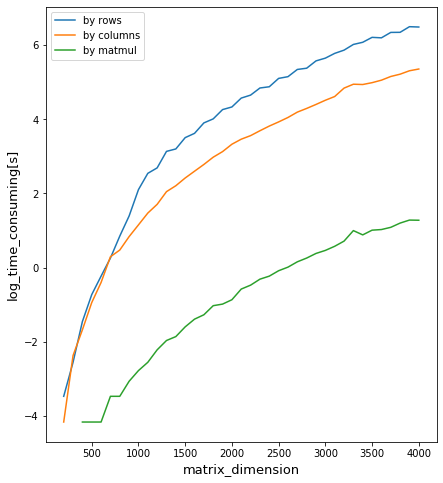

In [12]:
import matplotlib.pyplot as plt


 
print('Carico file txt')

m_dim=[]
t1=[]
t2=[]
t3=[]
value= 0.0
with open('time_consuming_by_fortran_upgrade.txt', encoding='utf-8') as a_file:  
    for a_line in a_file:                                             
        #print( a_line.rstrip().split()    )
        for i in range(0,4) :
            value=a_line.rstrip().split()[i]
            if i==0:
                m_dim.append(int (value) )
            if i==1:
                t1.append(np.log( float(value) ) )
            if i==2:
                t2.append(np.log(float(value) ) )
            if i==3:
                t3.append(np.log(float(value) ) )

                
fig,ax = plt.subplots(figsize=(7,8) )
ax.set_xlabel('matrix_dimension', fontsize = 13)
ax.set_ylabel('log_time_consuming[s]',fontsize=13)
plt.plot(m_dim,t1, label='by rows')
plt.plot(m_dim,t2,label='by columns')
plt.plot(m_dim,t3,label='by matmul',)
plt.legend()
plt.show()

Carico file txt


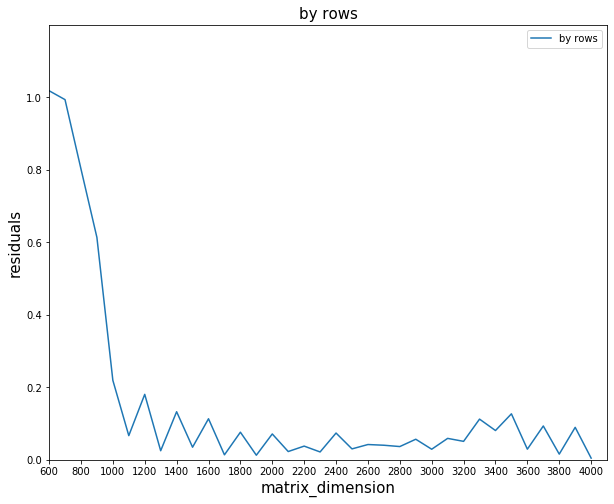

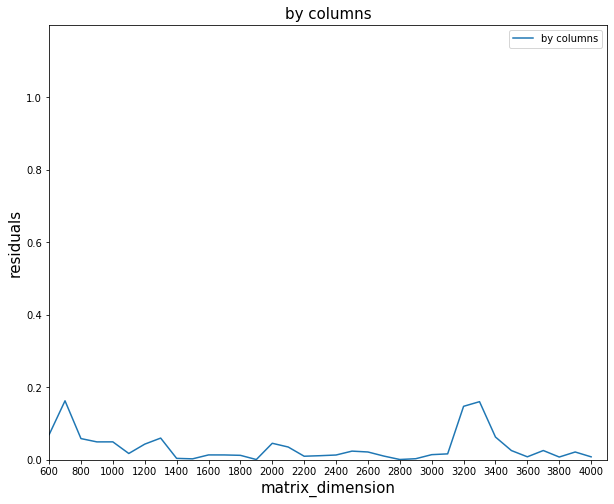

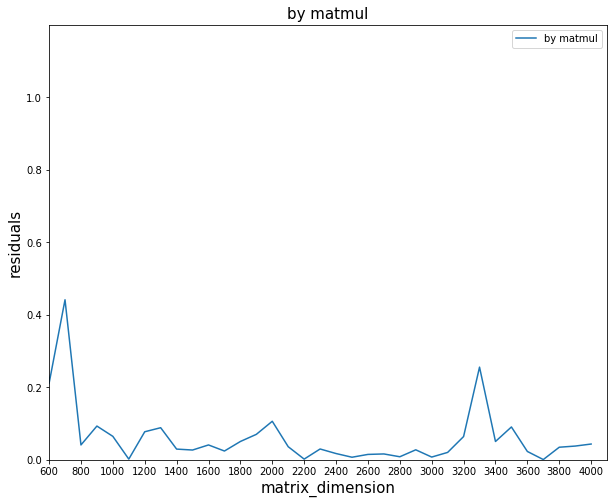

In [13]:


 
print('Carico file txt')

m_dim=[]
t1=[]
t2=[]
t3=[]
value= 0.0
with open('residuals.txt', encoding='utf-8') as a_file:  
    for a_line in a_file:                                             
        #print( a_line.rstrip().split()    )
        for i in range(0,4) :
            value=a_line.rstrip().split()[i]
            if i==0:
                m_dim.append(int (value) )
            if i==1:
                t1.append(float(value) )
            if i==2:
                t2.append(float(value) )
            if i==3:
                t3.append( float(value)  )

title=['by rows','by columns','by matmul']
t=[t1,t2,t3]

for i in range(3):   
    fig,ax = plt.subplots(figsize=(10,8) )
    ax.set_xlabel('matrix_dimension', fontsize = 15)
    ax.set_ylabel('residuals',fontsize=15)
    ax.set_title(title[i],fontsize=15)
    ax.set_xlim([600,4100])
    ax.set_ylim([0,1.2])
    plt.yticks(np.arange(0, 1.2, step=0.2))
    plt.xticks(np.arange(600, 4200, step=200))
    plt.plot(m_dim,t[i], label=str(title[i]) )
    plt.legend()
    plt.show()